<a href="https://colab.research.google.com/github/jfink09/Deep-Learning/blob/main/02_pytorch_classification_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. NN Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

- Types of food
- Spam emails of normal emails
- Dogs or cats

Book version of this notebook - https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make classification data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

# Make a thousand samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
# There will be two features of X for one feature of y
print(f"First five samples of X:\n {X[:5]}")
print(f"First five samples of y:\n {y[:5]}")

First five samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y:
 [1 1 1 1 0]


In [4]:
# y is either 0 or 1 which means one thing or another (binary classification)
print(y)

[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 

In [5]:
# Make a dataframe of circle data with Pandas
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


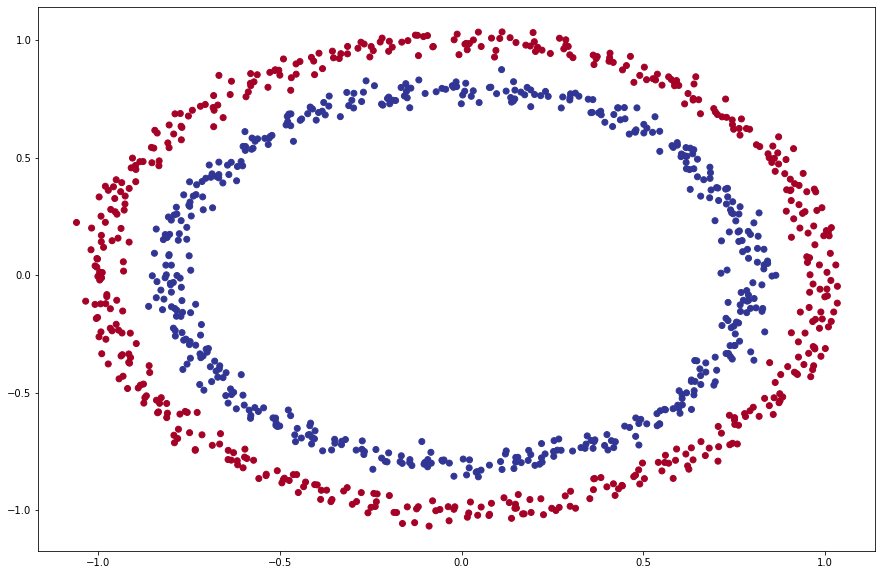

In [6]:
# Visualize to see patterns in the data
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu
            );

# **Note:** The data we are working with is often refered to as a toy dataset - a dataset that is small enough to experiment on, but still sizable enough to practice the fundamentals.

### 1.1. Check Input and Output Shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# Notice the data X and y are arrays (the arrays need to be changed to tensors)
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2. Turn the data from arrays into tensors and create train and test splits

In [10]:
import torch
torch.__version__

'1.12.1+cu113'

In [11]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [12]:
# Turn the data into tensors with default PyTorch datatype (float32 not the numpy default of float64)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test and 0.8 = 80% of data will be train)
                                                    random_state=42) #random_state is similar to manual_seed, but sklearn's version (manual_seed is for PyTorch)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test) # 80% of n_samples = 1000 is 800 and 20% is 200

(800, 200, 800, 200)

### 2.0. Building a model

Build a model to classify the blue and red dots.

To do so, we want to:
1. Setup device agnostic code, so the code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and an optimizer
4. Create a training and test loop

In [16]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Device agnostic code was setup. Create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method since we are subclassing `nn.Module()` that outlines the forward pass (forward computation) of the model
4. Instantiate an instance of the model class and send it to the target `device`

In [17]:
# Shape has 2 features, so the first linear layer needs in_features=2
X_train.shape

torch.Size([800, 2])

In [18]:
from sklearn import datasets
# 1. Construct a model that subclasses nn.Module()
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear() layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, # Takes in two features and upscales to five features
                             out_features=5) # The number of hidden units is the out_features of the layer
    self.layer_2 = nn.Linear(in_features=5, # Takes in five features to match the out_features of the first layer with an output layer of one feature (same shape as y)
                             out_features=1)
    
    # Can do Sequential instead
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
        nn.Linear(in_features=5,out_features=1)
    )
  
  # 3. Define a forward method that outlines to forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    return two_linear_layers(x) # Return this if doing sequential

# 4. Instantiate an instance of the model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [19]:
device

'cpu'

In [20]:
# See that the model's parameters are on the device
next(model_0.parameters()).device

device(type='cpu')

In [21]:
# Replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.4424,  0.2135],
                      [-0.6323, -0.6706],
                      [-0.3539,  0.6891],
                      [-0.0506,  0.2882],
                      [-0.5746, -0.2632]])),
             ('0.bias', tensor([ 0.3862,  0.2305,  0.3354,  0.0857, -0.0282])),
             ('1.weight',
              tensor([[-0.3713, -0.0977,  0.0666,  0.2414, -0.1986]])),
             ('1.bias', tensor([0.3663]))])

In [23]:
# Make predictions with the model
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [-0.],
        [0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1. Setup loss function and optimizer
Picking a loss function and an optimizer is problem specific.

- For regression models use MAE or MSE (mean absolute error or mean square error).
- For classification use binary cross entropy or categorical cross entropy (cross entropy).

The loss function will measure how wrong the model's predictions are.
Two of the most common and useful optimizers are SGD and Adam, but PyTorch has many built-in options.

* For the loss function, we will use `torch.nn.BCEWithLogitsLoss()`
* For different optimizers see `torch.optim`

In [24]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                      lr=0.1)

In [25]:
# Calculate accuracy - out of 100 examples, what percentage does the model get right
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### 3.0. Train model

To train the model, build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1. Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

Convert these **logits** into **prediciton probabilities** by passing them to an activation function (sigmoid for binary classification and softmax for multiclass classification).

Then conver the model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [26]:
# View the first five outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5] # Logits are the raw output of the model without being passed to any activation function
y_logits

tensor([[ 0.2400],
        [ 0.4016],
        [-0.0133],
        [ 0.3110],
        [ 0.2570]])

In [27]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [28]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5597],
        [0.5991],
        [0.4967],
        [0.5771],
        [0.5639]])

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [29]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for quality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 0., 1., 1.])

In [30]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze() # Squeeze removes an extra dimension
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probabilities -> pred labels

  # 2. Calculate loss and accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss() expects prediction probabilities as input, so use sigmoid on the logits
  #               y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss() expects raw logits as input (y_logits is the prediction and y_train is the true labels)
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    # Print out what is happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70494, Accuracy: 55.62% | Test Loss: 0.71337, Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.70063, Accuracy: 54.25% | Test Loss: 0.70805, Test Accuracy: 48.50%
Epoch: 20 | Loss: 0.69824, Accuracy: 52.88% | Test Loss: 0.70480, Test Accuracy: 48.50%
Epoch: 30 | Loss: 0.69681, Accuracy: 52.38% | Test Loss: 0.70264, Test Accuracy: 48.50%
Epoch: 40 | Loss: 0.69589, Accuracy: 51.62% | Test Loss: 0.70110, Test Accuracy: 47.00%
Epoch: 50 | Loss: 0.69524, Accuracy: 52.25% | Test Loss: 0.69994, Test Accuracy: 47.50%
Epoch: 60 | Loss: 0.69477, Accuracy: 51.50% | Test Loss: 0.69904, Test Accuracy: 47.00%
Epoch: 70 | Loss: 0.69442, Accuracy: 51.38% | Test Loss: 0.69831, Test Accuracy: 48.00%
Epoch: 80 | Loss: 0.69414, Accuracy: 51.62% | Test Loss: 0.69772, Test Accuracy: 47.50%
Epoch: 90 | Loss: 0.69392, Accuracy: 51.75% | Test Loss: 0.69724, Test Accuracy: 48.00%
Epoch: 100 | Loss: 0.69375, Accuracy: 51.75% | Test Loss: 0.69684, Test Accuracy: 48.50%
Epoch: 110 | Loss: 0.69361, Accu

In [32]:
loss_fn_w_logits = nn.BCEWithLogitsLoss() # Expects raw logits as inputs
loss_fn_wo_logits = nn.BCELoss() # Expects prediction probabilities as inputs

### 4.0. Make predictions and evaluate the model

From the metrics, it looks like the model is not learning anything (accuracy decreases as epochs increases and test accuracy is about 50% or a coin flip/guessing).

To inspect this, make some predicitions and make them visual.

To do so, import a function called `plot_decision_boundary()`

In [33]:
import requests
from pathlib import Path

# Download helper functions from Lear PyTorch repo (if it is not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

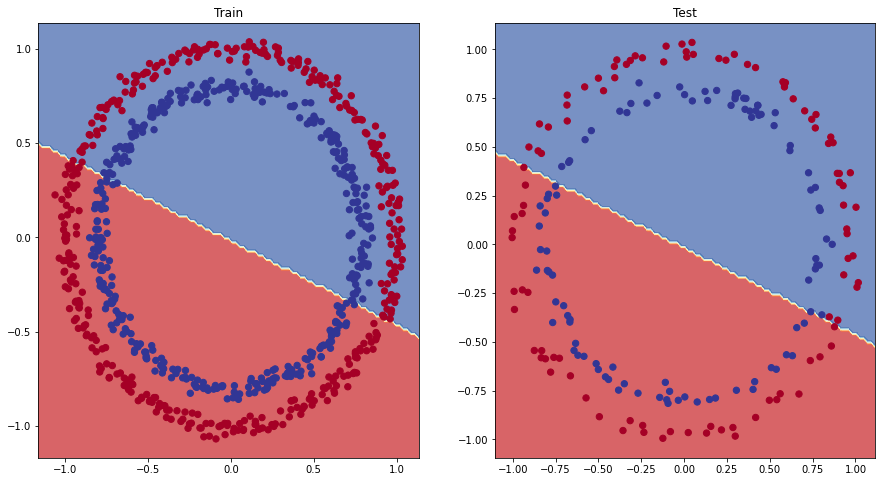

In [34]:
# Plot decision boundary of the model
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

# 5.0. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model rather than the data.

Because these options are all values we can change, they are called **hyperparameters**.

Will try this by:

* Adding more hidden units: 5 -> 10
* Increasing the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [46]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # This way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                lr=0.1)

In [49]:
# Write a training and testing loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Logits -> pred probabilities -> pred labels

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # Optimizer step (gradient descent)
  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    # Print what is happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69392, Acc: 50.50 | Test Loss: 0.69262, Test Acc: 50.50%
Epoch: 100 | Loss: 0.69305, Acc: 50.50 | Test Loss: 0.69380, Test Acc: 47.50%
Epoch: 200 | Loss: 0.69299, Acc: 51.12 | Test Loss: 0.69438, Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.38 | Test Loss: 0.69458, Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12 | Test Loss: 0.69465, Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00 | Test Loss: 0.69467, Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00 | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00 | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00 | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00 | Test Loss: 0.69468, Test Acc: 46.00%
